In [2]:
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import math


Assets and Data

In [39]:
stocks= ['MSFT', 'TSLA', 'K', 'AAPL', 'NKE', 'AMZN', 'BA']
end_date= dt.datetime.today()
start_date= end_date - dt.timedelta(365*2)
price= yf.download(stocks, start=start_date, end=end_date)['Adj Close'].pct_change().dropna()
returns= price
print(returns)

[*********************100%***********************]  7 of 7 completed

Ticker                         AAPL      AMZN        BA         K      MSFT  \
Date                                                                          
2022-12-06 00:00:00+00:00 -0.025370 -0.030326 -0.036035 -0.003817 -0.020304   
2022-12-07 00:00:00+00:00 -0.013785  0.002380 -0.010817  0.011222 -0.003060   
2022-12-08 00:00:00+00:00  0.012133  0.021366  0.014618 -0.005819  0.012399   
2022-12-09 00:00:00+00:00 -0.003435 -0.013946  0.002569 -0.015247 -0.008003   
2022-12-12 00:00:00+00:00  0.016390  0.016388  0.037485  0.023500  0.028889   
...                             ...       ...       ...       ...       ...   
2024-11-22 00:00:00+00:00  0.005908 -0.006351  0.041001  0.001851  0.010003   
2024-11-25 00:00:00+00:00  0.013051  0.021966  0.025521 -0.000739  0.004293   
2024-11-26 00:00:00+00:00  0.009404  0.031819 -0.015284  0.000247  0.021968   
2024-11-27 00:00:00+00:00 -0.000553 -0.010199  0.010878  0.000247 -0.011683   
2024-11-29 00:00:00+00:00  0.010216  0.010450  0.019

Calculate the mean, variance, and correlation matrix for all assets

In [170]:
class PortfolioAnalysis:
    def __init__(self, assets, start_date, end_date):
        self.assets = [asset.upper() for asset in assets]  
        self.start_date = start_date
        self.end_date = end_date
        self.data = data()
        self.daily_returns = self.calculate_daily_returns()

    def data(self):
         return yf.download(self.assets, start=self.start_date, end=self.end_date)['Adj Close']

    def calculate_daily_returns(self):
       return self.data.pct_change().dropna()

    def calculate_mean_returns(self):
        return self.daily_returns.mean() * 252 

    def calculate_variance(self):
       return self.daily_returns.var() * 252 

    def calculate_correlation_matrix(self):
       return self.daily_returns.corr()
    

     



mean_returns = portfolio.calculate_mean_returns()
variance = portfolio.calculate_variance()
correlation_matrix = portfolio.calculate_correlation_matrix()


print("Mean Returns (Annualized):")
print(mean_returns)

print("\nVariance (Annualized):")
print(variance)

print("\nCorrelation Matrix:")
print(correlation_matrix)


Mean Returns (Annualized):
Ticker
AAPL    0.273146
AMZN    0.465140
BA     -0.039286
K       0.139691
MSFT    0.300385
NKE    -0.104284
TSLA    0.497827
dtype: float64

Variance (Annualized):
Ticker
AAPL    0.049319
AMZN    0.095639
BA      0.097439
K       0.048089
MSFT    0.052712
NKE     0.097182
TSLA    0.355783
dtype: float64

Correlation Matrix:
Ticker      AAPL      AMZN        BA         K      MSFT       NKE      TSLA
Ticker                                                                      
AAPL    1.000000  0.403122  0.235859 -0.084073  0.521740  0.283707  0.381377
AMZN    0.403122  1.000000  0.240435 -0.134191  0.627530  0.241775  0.312590
BA      0.235859  0.240435  1.000000  0.022734  0.132644  0.260857  0.192447
K      -0.084073 -0.134191  0.022734  1.000000 -0.102847  0.077305 -0.041433
MSFT    0.521740  0.627530  0.132644 -0.102847  1.000000  0.192879  0.278683
NKE     0.283707  0.241775  0.260857  0.077305  0.192879  1.000000  0.125365
TSLA    0.381377  0.312590  0.

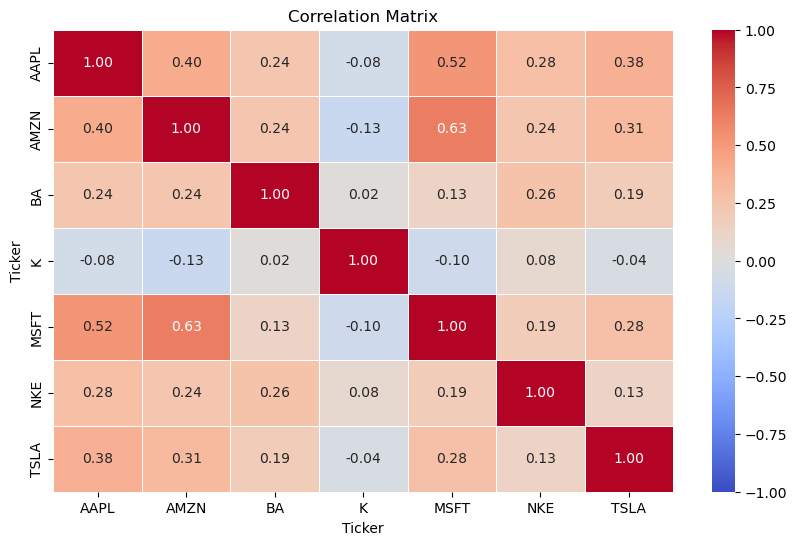

In [169]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

 Calculate efficient frontier and optimal weights for your portfolio

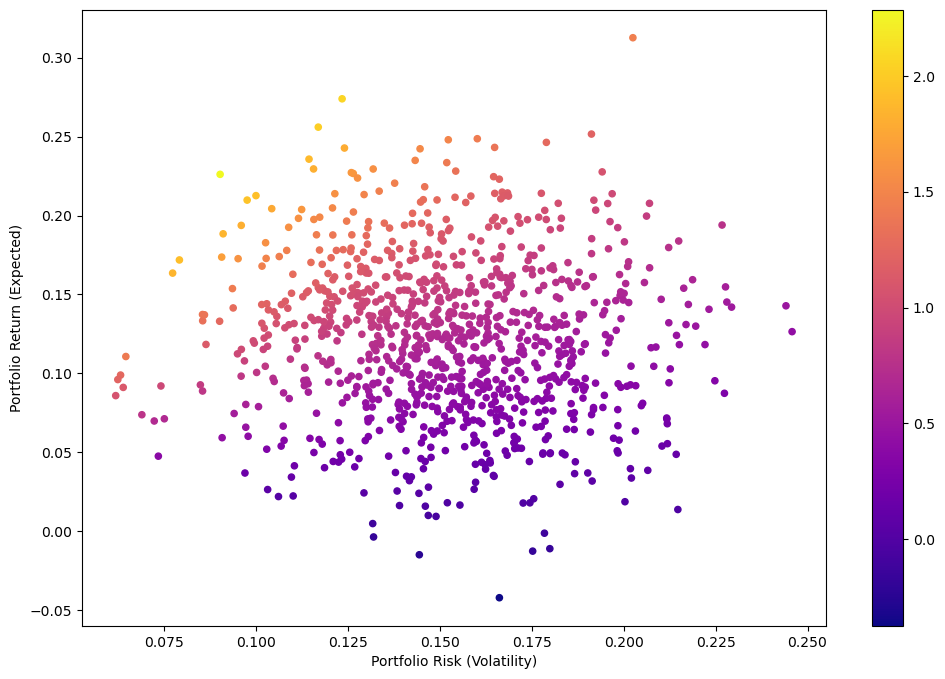

In [188]:

num_portfolios = 1000
np.random.seed(42)

portfolio_returns = np.random.normal(0.12, 0.05, num_portfolios)  
portfolio_volatility = np.random.normal(0.15, 0.03, num_portfolios)  

risk_free_rate = 0.02
sharpe_ratio = (portfolio_returns - risk_free_rate) / portfolio_volatility

frontier_data = pd.DataFrame({'Expected Return': portfolio_returns, 'Risk (Volatility)': portfolio_volatility})

frontier_data.plot(x='Risk (Volatility)', y='Expected Return', c=sharpe_ratio, kind='scatter', figsize=(12, 8), cmap='plasma')

plt.xlabel('Portfolio Risk (Volatility)')
plt.ylabel('Portfolio Return (Expected)')
plt.show()


AttributeError: 'PortfolioAnalysis' object has no attribute 'plot_correlation_matrix'